#### Creation of the experimental genotoxicity dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
raw_dat_dir = '/home/grace/Documents/python/genetox/data/raw/'
processed_dat_dir = '/home/grace/Documents/python/genetox/data/processed/'
interim_dat_dir = '/home/grace/Documents/python/genetox/data/interim/'
figures_dir = '/home/grace/Documents/python/genetox/reports/figures/'
external_dat_dir = '/home/grace/Documents/python/genetox/data/external/'

In [3]:
raw_genetox = pd.read_excel(raw_dat_dir+'combined_genetox_standard_2021-02-05.xlsx')

In [4]:
raw_genetox.shape

(54805, 31)

In [34]:
import sys

sys.path.append('/home/grace/Documents/python/genetox/src/models/')

from genetox_dict import *

from genetox_dict2 import *

In [35]:
df = clean_up(raw_genetox)

In [36]:
df.shape

(54805, 34)

In [37]:
len(df.standard_assay_type.unique().tolist())

673

In [38]:
df_rev = clean_up2(df)

In [40]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(processed_dat_dir+'genetox_merged_110221_all.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_rev.to_excel(writer, sheet_name='all_genetox_data')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

#### This did a reasonable first cut of the mapping but manual checking showed that some mappings need to be updated based on species information conflicts.

Remapping of forward mutation assays if they are mammalian cells

In [46]:
species_ = list(set(df_rev[df_rev['standard_assay_type'] == 'bacterial forward mutation assay']['species'].tolist()))

In [47]:
species_

['Chinese hamster Ovary (CHO)',
 'S. typhimurium, other: TA92, TA1535,TA100, TA1537, TA94 and TA98',
 'Chinese hamster lung fibroblasts (V79)',
 'S. typhimurium, other: TM677',
 'S. typhimurium TA 98',
 'yeast, other: Neurospora crassa',
 'S. typhimurium, other: TA 100, TA98, TA97, TA 102',
 'S. typhimurium TA 100',
 'S. typhimurium, other: TA 1532',
 'S. typhimurium TA 1535, TA 1537, TA 98 and TA 100',
 'S. typhimurium TA 1535, TA 1537, TA 98, TA 100 and E. coli WP2',
 'mouse lymphoma L5178Y cells',
 'S. typhimurium, other: TA100, TA1535, TA98, TA1537 and Escherichia coli WP2 uvrA.',
 'E. coli WP2 uvr A',
 'other: S typhimurium (G46, TA 1535, TA 100, C3076, TA1537, D3052, TA1538, and TA98) and two tryptophan auxotrophs of E coli (WP2 and WF2uvrA-).',
 'S. typhimurium, other: TA 1535, TA 100, TA 1537, TA 98',
 'S. typhimurium, other: TA 97a, TA 98, TA 100, TA 102, TA 1535',
 'S. typhimurium, other: TA97, TA98, TA100, TA102',
 'S. typhimurium TA 1535',
 'S. typhimurium TA 1535, TA 1537,

In [50]:
mask = (df_rev['standard_assay_type'] == 'bacterial forward mutation assay') & (df_rev['species'].isin(['Chinese hamster Ovary (CHO)', 'Chinese hamster lung fibroblasts (V79)']))

In [51]:
mask2 = (df_rev['standard_assay_type'] == 'bacterial forward mutation assay') & (df_rev['species'] == 'mouse lymphoma L5178Y cells')

In [57]:
df_rev[mask].index

Int64Index([392, 416, 428, 438, 439, 444, 445, 450, 451, 455], dtype='int64')

In [66]:
for index in df_rev[mask].index:
    if df_rev.loc[index, 'standard_assay_type'] == 'bacterial forward mutation assay':
        df_rev.loc[index, 'standard_assay_type'] = 'in vitro mammalian cell gene mutation test using the Hprt and xprt genes'

In [67]:
for index in df_rev[mask2].index:
    if df_rev.loc[index, 'standard_assay_type'] == 'bacterial forward mutation assay':
        df_rev.loc[index, 'standard_assay_type'] = 'in vitro mammalian cell gene mutation test using the thymidine kinase gene'

Ames tests incorrectly mapped to yeast and other fungi or mammalian cells

In [70]:
species_1 = list(set(df_rev[df_rev['standard_assay_type'] == 'bacterial reverse mutation test']['species'].tolist()))

In [89]:
[e for e in species_1[1:] if not any(x in e for x in ['typhimurium', 'coli', 'TA', 'ESC', 'typhymurium' 'SAL' ]) ]


['other: WP2P',
 'yeast, other: Saccharomyces cerevisiae, D4',
 'mammalian cell line, other: In vitro mammalian cell transformation assay',
 'other: Bacillus subtilis/: H17(rec+)and M45(Rec-)',
 'other: Saccharomyces cerevisiae: D4',
 'other: Bacillus subtilis M45 (rec -) and H17 (rec +)',
 'other: Saccharomyces cerevisiae, strain 04',
 'other: Streptomyces coelicolor A3/hisA1',
 'other: Bacillus subtilis/ H17, M45',
 'Chinese hamster lung fibroblasts (V79)',
 'yeast, other: Saccharomyces cerevisiae D4',
 'bacteria, other: BACILLUS SUBTILIS,H17 and M45 rec assay',
 'SALMONELLA TYPHIMURIUM',
 'Chinese hamster Ovary (CHO)',
 'other:',
 'other: Saccharomyces cerevisiae D4',
 'STREPTOMYCES GRISEOFLAVUS',
 'yeast, other: Neurospora crassa',
 'BACTERIOPHAGE',
 'other: S. typhymurium BA 9',
 'other: D3 strain of S. cerevisiae',
 'bacteria, other:',
 'other: Human gastric lavage and saliva',
 'mammalian cell line, other: A Chinese hamster lung fibroblast cell line (CHL)',
 'Saccharomyces cerev

In [90]:
mask_ames = (df_rev['standard_assay_type'] == 'bacterial reverse mutation test') & (df_rev['species'].isin([e for e in species_1[1:] if not any(x in e for x in ['typhimurium', 'typhymurium','coli', 'TA', 'ESC', 'SAL' ]) ]))

In [92]:
for index in df_rev[mask_ames].index:
    if df_rev.loc[index, 'standard_assay_type'] == 'bacterial reverse mutation test':
        df_rev.loc[index, 'standard_assay_type'] = 'Other mutation'

Some of the mammalian gene mutation assays are mismapped

In [95]:
species_2 = list(set(df_rev[df_rev['standard_assay_type'] == 'in vitro mammalian cell gene mutation test']['species'].tolist()))

In [100]:
mask_ML = (df_rev['standard_assay_type'] == 'in vitro mammalian cell gene mutation test') & (df_rev['species'].isin([e for e in species_2 if 'L5178Y' in e]))

In [104]:
#df_rev[mask_ML]['guideline'].tolist()

Looks like the mouse lymphoma cell line corresponds to the right mapping. No change made.

But it looks like some Ames and other bacterial have filtered through - sigh..

In [122]:
[e for e in species_2 if any(x in e for x in ['G46', 'Sacc'])]

['other: G46, TA1530', 'Saccharomyces cerevisiae']

In [111]:
mask_gene = (df_rev['standard_assay_type'] == 'in vitro mammalian cell gene mutation test') & (df_rev['species'].isin([e for e in species_2 if any(x in e for x in ['typhimurium'])]))

In [117]:
df_rev[mask_gene].index

Int64Index([38335, 38337, 38750, 39549, 42524], dtype='int64')

In [118]:
for index in df_rev[mask_gene].index:
    if df_rev.loc[index, 'standard_assay_type'] == 'Other mutation':
        df_rev.loc[index, 'standard_assay_type'] = 'bacterial reverse mutation test'

In [123]:
mask_gene2 = (df_rev['standard_assay_type'] == 'in vitro mammalian cell gene mutation test') & (df_rev['species'].isin([e for e in species_2 if any(x in e for x in ['GA', 'Sacc'])]))

In [124]:
df_rev[mask_gene2]

,source,name,casrn,assay_category,assay_type,assay_result,species,strain,metabolic_activation,cytotoxicity,...,sex,dose_response,panel_report,glp,guideline,dtxsid,assay_type_standard,standard_assay_type,assay_result_std,assay_outcome
39226,eChemPortal,"sodium 1,1,3-trioxo-2,3-dihydro-1H-1λ⁶,2-benzo...",128-44-9,in vitro,mammalian cell gene mutation assay,negative,Saccharomyces cerevisiae,NaN,without,no,...,NaN,NaN,NaN,no data,according to other guideline:,DTXSID5021253,mammalian gene mutation test (in vitro),in vitro mammalian cell gene mutation test,negative,0
39229,eChemPortal,"sodium 1,1,3-trioxo-2,3-dihydro-1H-1lambda6,2-...",128-44-9,in vitro,mammalian cell gene mutation assay,negative,Saccharomyces cerevisiae,NaN,without,no,...,NaN,NaN,NaN,no data,according to other guideline:,DTXSID5021253,mammalian gene mutation test (in vitro),in vitro mammalian cell gene mutation test,negative,0


In [125]:
for index in df_rev[mask_gene2].index:
    if df_rev.loc[index, 'standard_assay_type'] == 'in vitro mammalian cell gene mutation test':
        df_rev.loc[index, 'standard_assay_type'] = 'Other mutation'

In [127]:
df_rev[mask_gene2]

,source,name,casrn,assay_category,assay_type,assay_result,species,strain,metabolic_activation,cytotoxicity,...,sex,dose_response,panel_report,glp,guideline,dtxsid,assay_type_standard,standard_assay_type,assay_result_std,assay_outcome
39226,eChemPortal,"sodium 1,1,3-trioxo-2,3-dihydro-1H-1λ⁶,2-benzo...",128-44-9,in vitro,mammalian cell gene mutation assay,negative,Saccharomyces cerevisiae,NaN,without,no,...,NaN,NaN,NaN,no data,according to other guideline:,DTXSID5021253,mammalian gene mutation test (in vitro),Other mutation,negative,0
39229,eChemPortal,"sodium 1,1,3-trioxo-2,3-dihydro-1H-1lambda6,2-...",128-44-9,in vitro,mammalian cell gene mutation assay,negative,Saccharomyces cerevisiae,NaN,without,no,...,NaN,NaN,NaN,no data,according to other guideline:,DTXSID5021253,mammalian gene mutation test (in vitro),Other mutation,negative,0


Looks like in vitro mammalian cell MN contain other species that are not relevant

In [128]:
species_MN = list(set(df_rev[df_rev['standard_assay_type'] == 'in vitro mammalian cell micronucleus test']['species'].tolist()))

In [133]:
[e for e in species_MN[1:] if any(x in e for x in ['TRAD', 'PLANT', 'plant', 'ONION'])]

['TRADESCANTIA', 'ALLIUM CEPA (ONION)']

In [137]:
mask_MNivt = (df_rev['standard_assay_type'] == 'in vitro mammalian cell micronucleus test') & (df_rev['species'].isin([e for e in species_MN[1:] if any(x in e for x in ['TRAD', 'PLANT', 'plant', 'ONION'])]))

In [139]:
for index in df_rev[mask_MNivt].index:
    if df_rev.loc[index, 'standard_assay_type'] == 'in vitro mammalian cell micronucleus test':
        df_rev.loc[index, 'standard_assay_type'] = 'chromosome aberrations (plant)'

In [140]:
species_CA = list(set(df_rev[df_rev['standard_assay_type'] == 'in vitro mammalian chromosome aberration test']['species'].tolist()))

In [146]:
#species_CA

In [145]:
[e for e in species_CA[1:] if any(x in e for x in ['TRAD', 'PLANT', 'plant', 'ONION', 'BARLEY', 'VIC', 'ESCHERICHIA COLI', 'ASP', 'BAC', 'bacc'])]

['ESCHERICHIA COLI',
 'BARLEY',
 'PLANTS',
 'VICIA FABA',
 'ASPERGILLUS NIDULANS',
 'ALLIUM CEPA (ONION)']

In [147]:
mask_CAivt = (df_rev['standard_assay_type'] == 'in vitro mammalian chromosome aberration test') & (df_rev['species'].isin([e for e in species_CA[1:] if any(x in e for x in ['TRAD', 'PLANT', 'plant', 'ONION', 'BARLEY', 'VIC'])]))

In [149]:
for index in df_rev[mask_CAivt].index:
    if df_rev.loc[index, 'standard_assay_type'] == 'in vitro mammalian chromosome aberration test':
        df_rev.loc[index, 'standard_assay_type'] = 'chromosome aberrations (plant)'

In [153]:
mask_CAivt2 = (df_rev['standard_assay_type'] == 'in vitro mammalian chromosome aberration test') & (df_rev['species'].isin([e for e in species_CA[1:] if any(x in e for x in ['ESCHERICHIA COLI', 'SACC','ASP', 'BAC', 'bacc'])]))

In [154]:
for index in df_rev[mask_CAivt2].index:
    if df_rev.loc[index, 'standard_assay_type'] == 'in vitro mammalian chromosome aberration test':
        df_rev.loc[index, 'standard_assay_type'] = 'Other chromosomal aberration'

In [156]:
#df_rev[mask_CAivt2]

In [157]:
species_CAiv = list(set(df_rev[df_rev['standard_assay_type'] == 'in vivo chromosome aberrations']['species'].tolist()))

In [159]:
mask_CAiv = (df_rev['standard_assay_type'] == 'in vivo chromosome aberrations') & (df_rev['species'].isin([e for e in species_CAiv[1:] if any(x in e for x in ['PLANTS', 'BARL','ONIO'])]))

In [161]:
for index in df_rev[mask_CAiv].index:
    if df_rev.loc[index, 'standard_assay_type'] == 'in vivo chromosome aberrations':
        df_rev.loc[index, 'standard_assay_type'] = 'chromosome aberrations (plant)'

In [163]:
mask_CAiv2 = (df_rev['standard_assay_type'] == 'in vivo chromosome aberrations') & (df_rev['species'].isin([e for e in species_CAiv[1:] if any(x in e for x in ['ESCHERIC', 'typh', 'bacc','DROS','Coli'])]))

In [164]:
for index in df_rev[mask_CAiv2].index:
    if df_rev.loc[index, 'standard_assay_type'] == 'in vivo chromosome aberrations':
        df_rev.loc[index, 'standard_assay_type'] = 'Other chromosomal aberration'

In [167]:
species_MNiv = list(set(df_rev[df_rev['standard_assay_type'] == 'in vivo micronucleus test']['species'].tolist()))

In [169]:
mask_MNiv = (df_rev['standard_assay_type'] == 'in vivo micronucleus test') & (df_rev['species'].isin([e for e in species_MNiv[1:] if any(x in e for x in ['PLANTS', 'PLANT','VIC', 'Vic', 'Plant', 'BARL','ONIO'])]))

In [170]:
for index in df_rev[mask_MNiv].index:
    if df_rev.loc[index, 'standard_assay_type'] == 'in vivo micronucleus test':
        df_rev.loc[index, 'standard_assay_type'] = 'chromosome aberrations (plant)'

In [171]:
mask_MNiv2 = (df_rev['standard_assay_type'] == 'in vivo micronucleus test') & (df_rev['species'].isin([e for e in species_MNiv[1:] if any(x in e for x in ['ESCHERIC', 'typh', 'bacc','DROS','Coli'])]))

In [172]:
for index in df_rev[mask_MNiv2].index:
    if df_rev.loc[index, 'standard_assay_type'] == 'in vivo micronucleus test':
        df_rev.loc[index, 'standard_assay_type'] = 'Other chromosomal aberration'

Other chromosomal aberrations to abberration typo

In [175]:
for index in df_rev[df_rev['standard_assay_type'] == 'Other chromosomal aberrations'].index:
    df_rev.loc[index, 'standard_assay_type'] = 'Other chromosomal aberration'

Change 2 assay names: pol A and Rec assay

In [178]:
for index in df_rev[(df_rev['standard_assay_type'] == 'pol_A assay') | (df_rev['standard_assay_type'] == 'Rec assay') ].index:
    df_rev.loc[index, 'standard_assay_type'] = 'DNA damage/repair'

In [179]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(processed_dat_dir+'genetox_merged_110221_all_revised.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df_rev.to_excel(writer, sheet_name='all_genetox_data')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [183]:
df = df_rev.copy()

In [186]:
df.drop(['assay_type_standard'], axis = 1, inplace = True)

In [187]:
df.standard_assay_type.unique()

array(['bacterial fluctuation assay', 'DNA damage/repair',
       'bacterial forward mutation assay',
       'in vitro mammalian cell gene mutation test using the Hprt and xprt genes',
       'in vitro mammalian cell gene mutation test using the thymidine kinase gene',
       'bacterial reverse mutation test', 'Other mutation', 'Other',
       'in vitro mammalian chromosome aberration test',
       'in vivo chromosome aberrations', 'cytotoxicity',
       'Drosophila sex-linked recessive lethal (SLRL) test',
       'chromosome aberrations (plant)', 'Other chromosomal aberration',
       'in vivo micronucleus test',
       'in vitro mammalian cell gene mutation test',
       'transgenic rodent somatic and germ cell gene mutation assays (TGR)',
       'rodent dominant lethal assay',
       'in vitro mammalian cell micronucleus test', nan], dtype=object)

Creating an aggregate study type based on the standardised assay types

In [188]:
df['aggregate_study_type'] =df['standard_assay_type']

In [190]:
tag_aggregate= {'bacterial fluctuation assay': 'other', 
              'DNA damage/repair' : 'DNA damage/repair',
       'bacterial forward mutation assay' : 'other',
       'in vitro mammalian cell gene mutation test using the Hprt and xprt genes' : 'ivt_gene_mutation',
       'in vitro mammalian cell gene mutation test using the thymidine kinase gene': 'MLA',
       'bacterial reverse mutation test': 'Ames', 
        'Other mutation':'other', 
        'Other':'other',
       'in vitro mammalian chromosome aberration test' : 'ivtCA',
       'in vivo chromosome aberrations': 'ivCA', 
        'cytotoxicity' : 'other',
       'Drosophila sex-linked recessive lethal (SLRL) test' : 'other',
       'chromosome aberrations (plant)':'other', 
        'Other chromosomal aberration':'other',
       'in vivo micronucleus test' : 'ivMN',
       'in vitro mammalian cell gene mutation test' : 'ivt_gene_mutation',
       'transgenic rodent somatic and germ cell gene mutation assays (TGR)' : 'TGR',
       'rodent dominant lethal assay': 'DLT',
       'in vitro mammalian cell micronucleus test' : 'ivtMN', 
               }

In [191]:
df['aggregate_study_type'].replace(tag_aggregate , inplace = True)

In [197]:
tag_simple = {'other': 'other', 'ivtCA': 'clastogen', 'ivtMN': 'clastogen', 'DNA damage/repair': 'other', 'ivCA': 'clastogen', 'ivMNT': 'clastogen',
       'Ames': 'Ames', 'ivt_gene_mutation': 'gene_mutation', 'MLA': 'clastogen', 'DLT': 'clastogen', 'TGR': 'clastogen', 'ivMN' :'clastogen' }

In [198]:
df['simple_aggregate'] = df['aggregate_study_type']

In [199]:
df['simple_aggregate'].replace(tag_simple , inplace = True)

In [245]:
df.simple_aggregate.unique()

array(['other', 'gene_mutation', 'clastogen', 'Ames'], dtype=object)

There seem to be still some nans unaccounted for.

In [205]:
for index in df.loc[(df['aggregate_study_type'].isnull()) & (df['standard_assay_type'].isnull()) & (df['simple_aggregate'].isnull())].index:
    df.loc[index, 'standard_assay_type'] = 'Other'
    df.loc[index, 'aggregate_study_type'] = 'other'
    df.loc[index, 'simple_aggregate'] = 'other'

In [209]:
df.simple_aggregate.unique()

array(['other', 'gene_mutation', 'clastogen', 'Ames'], dtype=object)

In [210]:
df.head()

,source,name,casrn,assay_category,assay_type,assay_result,species,strain,metabolic_activation,cytotoxicity,...,dose_response,panel_report,glp,guideline,dtxsid,standard_assay_type,assay_result_std,assay_outcome,aggregate_study_type,simple_aggregate
0,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 98,NaN,with and without,not determined,...,NaN,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,DTXSID9024142,bacterial fluctuation assay,negative,0,other,other
1,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 100,NaN,with and without,not determined,...,NaN,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,DTXSID9024142,bacterial fluctuation assay,negative,0,other,other
2,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 98,NaN,with and without,not determined,...,NaN,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,DTXSID9024142,bacterial fluctuation assay,negative,0,other,other
3,eChemPortal,nickel(2+) dichloride,7718-54-9,in vitro,bacterial fluctuation assay,negative,"other: E. coli strains WP2+, WP2-, WP6, WP67, ...",NaN,with,yes,...,NaN,NaN,no data,according to other guideline: Gatehouse 1978 (...,DTXSID7040316,bacterial fluctuation assay,negative,0,other,other
4,eChemPortal,nickel(2+) ion dichloride,7718-54-9,in vitro,bacterial fluctuation assay,negative,"other: E. coli strains WP2+, WP2-, WP6, WP67, ...",NaN,with,yes,...,NaN,NaN,no data,according to other guideline: Gatehouse 1978 (...,DTXSID7040316,bacterial fluctuation assay,negative,0,other,other


Final dataset created - manual check completed.

In [211]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter(processed_dat_dir+'genetox_merged_110221_final.xlsx', engine='xlsxwriter')

# Convert the dataframe to an XlsxWriter Excel object.
df.to_excel(writer, sheet_name='all_genetox_data')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

In [213]:
df.shape

(54805, 35)

In [214]:
df.shape

(54805, 35)

In [215]:
df.dtxsid.nunique()

9299

In [217]:
df.columns

Index(['source', 'name', 'casrn', 'assay_category', 'assay_type',
       'assay_result', 'species', 'strain', 'metabolic_activation',
       'cytotoxicity', 'data_quality', 'reference', 'year', 'document_source',
       'duration', 'assay_potency', 'comment', 'document_number', 'title',
       'genetox_results', 'reference_url', 'genetox_note', 'protocol_era',
       'assay_code', 'sex', 'dose_response', 'panel_report', 'glp',
       'guideline', 'dtxsid', 'standard_assay_type', 'assay_result_std',
       'assay_outcome', 'aggregate_study_type', 'simple_aggregate'],
      dtype='object')

In [226]:
df.source.value_counts()

eChemPortal           38453
TOXNET                 5986
COSMOS                 4403
NTP                    2904
Kirkland_2005_2011     1667
US_NTP                  749
SCCS                    185
CSCL_ISHL               174
ECHA                    108
CosE                     96
EFSA                     52
ISSTox                   21
BASF                      7
Name: source, dtype: int64

In [222]:
df['source_aggregate'] = df['source']

In [231]:
tag_source = {'eChemPortal' : 'eChemPortal' ,
 'TOXNET':'TOXNET',
 'COSMOS': 'COSMOS',
 'EFSA':'ECVAM',
 'Kirkland_2005_2011' : 'ECVAM',
 'US_NTP': 'ECVAM',
 'SCCS': 'ECVAM',
 'CosE': 'ECVAM',
 'ECHA': 'ECVAM',
 'ISSTox': 'ECVAM',
 'BASF': 'ECVAM',
 'NTP': 'NTP',
 'CSCL_ISHL': 'ECVAM'}

In [232]:
df['source_aggregate'].replace(tag_source, inplace = True)

#### Section 2.1 Dataset described in the manuscript

In [233]:
df.source_aggregate.value_counts()

eChemPortal    38453
TOXNET          5986
COSMOS          4403
ECVAM           3059
NTP             2904
Name: source_aggregate, dtype: int64

In [237]:
echemportal_ids = df[df['source_aggregate'] == 'eChemPortal']['dtxsid'].tolist()
TOXNET_ids = df[df['source_aggregate'] == 'TOXNET']['dtxsid'].tolist()
COSMOS_ids = df[df['source_aggregate'] == 'COSMOS']['dtxsid'].tolist()
ECVAM_ids = df[df['source_aggregate'] == 'ECVAM']['dtxsid'].tolist()
NTP_ids = df[df['source_aggregate'] == 'NTP']['dtxsid'].tolist()

#### Overlap between inventories: Table 1 - new for revised submission to provide some information about the coverage and overlap between the data sources used in the analysis

In [240]:
print(len([e for e in echemportal_ids if e in echemportal_ids]))
print(len([e for e in echemportal_ids if e in TOXNET_ids]))
print(len([e for e in echemportal_ids if e in COSMOS_ids]))
print(len([e for e in echemportal_ids if e in ECVAM_ids]))
print(len([e for e in echemportal_ids if e in NTP_ids]))
#print(len[e for e in echemportal_ids if e in echemportal_ids])
#print(len[e for e in echemportal_ids if e in echemportal_ids])
#print(len[e for e in echemportal_ids if e in echemportal_ids])

38453
4132
2293
1830
7614


In [241]:
print(len([e for e in NTP_ids if e in echemportal_ids]))
print(len([e for e in NTP_ids if e in TOXNET_ids]))
print(len([e for e in NTP_ids if e in COSMOS_ids]))
print(len([e for e in NTP_ids if e in ECVAM_ids]))
print(len([e for e in NTP_ids if e in NTP_ids]))

1259
811
225
477
2904


In [242]:
print(len([e for e in TOXNET_ids if e in echemportal_ids]))
print(len([e for e in TOXNET_ids if e in TOXNET_ids]))
print(len([e for e in TOXNET_ids if e in COSMOS_ids]))
print(len([e for e in TOXNET_ids if e in ECVAM_ids]))
print(len([e for e in TOXNET_ids if e in NTP_ids]))

1338
5986
259
2421
2619


In [243]:
print(len([e for e in COSMOS_ids if e in echemportal_ids]))
print(len([e for e in COSMOS_ids if e in TOXNET_ids]))
print(len([e for e in COSMOS_ids if e in COSMOS_ids]))
print(len([e for e in COSMOS_ids if e in ECVAM_ids]))
print(len([e for e in COSMOS_ids if e in NTP_ids]))

3346
2471
4403
589
2583


In [244]:
print(len([e for e in ECVAM_ids if e in echemportal_ids]))
print(len([e for e in ECVAM_ids if e in TOXNET_ids]))
print(len([e for e in ECVAM_ids if e in COSMOS_ids]))
print(len([e for e in ECVAM_ids if e in ECVAM_ids]))
print(len([e for e in ECVAM_ids if e in NTP_ids]))

1041
1993
94
3059
1957


##### How many chemicals and records where there are just Ames and clastogenicity data

In [247]:
mask_ames_CA = (df['simple_aggregate'] == 'Ames')| (df['simple_aggregate'] =='clastogen')


(39507, 36)
8442


In [250]:
print('There are {} Ames and clastogenicity records in the database.'.format(df[mask_ames_CA].shape[0]))
print('There are {} unique substances in this filtered dataset.'.format(df[mask_ames_CA]['dtxsid'].nunique()))

There are 39507 Ames and clastogenicity records in the database.
There are 8442 unique substances in this filtered dataset.


In [252]:
df[mask_ames_CA].simple_aggregate.value_counts()

Ames         25111
clastogen    14396
Name: simple_aggregate, dtype: int64

In [290]:
df.groupby('dtxsid')['simple_aggregate'].value_counts()

dtxsid          simple_aggregate
DTXSID00100074  gene_mutation        1
DTXSID00100498  clastogen            1
DTXSID00100670  Ames                 9
                clastogen            4
                gene_mutation        4
                                    ..
DTXSID9099080   Ames                 9
                clastogen            4
                gene_mutation        4
DTXSID9099876   Ames                11
                clastogen            2
Name: simple_aggregate, Length: 18658, dtype: int64

In [257]:
df.head()

,source,name,casrn,assay_category,assay_type,assay_result,species,strain,metabolic_activation,cytotoxicity,...,panel_report,glp,guideline,dtxsid,standard_assay_type,assay_result_std,assay_outcome,aggregate_study_type,simple_aggregate,source_aggregate
0,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 98,NaN,with and without,not determined,...,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,DTXSID9024142,bacterial fluctuation assay,negative,0,other,other,eChemPortal
1,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 100,NaN,with and without,not determined,...,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,DTXSID9024142,bacterial fluctuation assay,negative,0,other,other,eChemPortal
2,eChemPortal,"1,3,5-trinitro-1,3,5-triazinane",121-82-4,in vitro,fluctuation test,negative,S. typhimurium TA 98,NaN,with and without,not determined,...,NaN,no data,equivalent or similar to OECD Guideline 471 (B...,DTXSID9024142,bacterial fluctuation assay,negative,0,other,other,eChemPortal
3,eChemPortal,nickel(2+) dichloride,7718-54-9,in vitro,bacterial fluctuation assay,negative,"other: E. coli strains WP2+, WP2-, WP6, WP67, ...",NaN,with,yes,...,NaN,no data,according to other guideline: Gatehouse 1978 (...,DTXSID7040316,bacterial fluctuation assay,negative,0,other,other,eChemPortal
4,eChemPortal,nickel(2+) ion dichloride,7718-54-9,in vitro,bacterial fluctuation assay,negative,"other: E. coli strains WP2+, WP2-, WP6, WP67, ...",NaN,with,yes,...,NaN,no data,according to other guideline: Gatehouse 1978 (...,DTXSID7040316,bacterial fluctuation assay,negative,0,other,other,eChemPortal


#### Categorisation to derive overall outcomes - this is the benchmark set of outcomes that is being used to evaluate performance for the in silico tools being used.

In [291]:
calls = {}
for i, group in df.groupby('dtxsid'):
    subset = group[['simple_aggregate', 'assay_outcome']]
    tuples = [tuple(x) for x in subset.values]
    if ('Ames', 1) in tuples:
        calls[i]='gentox'
    elif ('clastogen', 1) in tuples:
        calls[i]='clastogen'  
    elif ('Ames', 2) in tuples:
        calls[i]='inconclusive'    
    elif ('clastogen', 2) in tuples:
        calls[i]='inconclusive' 
    elif ('Ames', 0) in tuples:
        calls[i]='non gentox'
    elif ('clastogen', 0) in tuples:
        calls[i]='not clastogen'    
    else:
        None

In [295]:
df_demarini = pd.DataFrame(calls.items(), columns = ['dtxsid', 'DeMarini_call'])

These are noted in Section 2.3.

In [304]:
df_demarini.DeMarini_call.value_counts()

non gentox       5328
gentox           2055
clastogen         673
not clastogen     257
inconclusive      129
Name: DeMarini_call, dtype: int64

In [303]:
9299-8442

857

#### Plot of the distribution of the genotoxicity categorisation assignments: Figure 3 in the revised submission

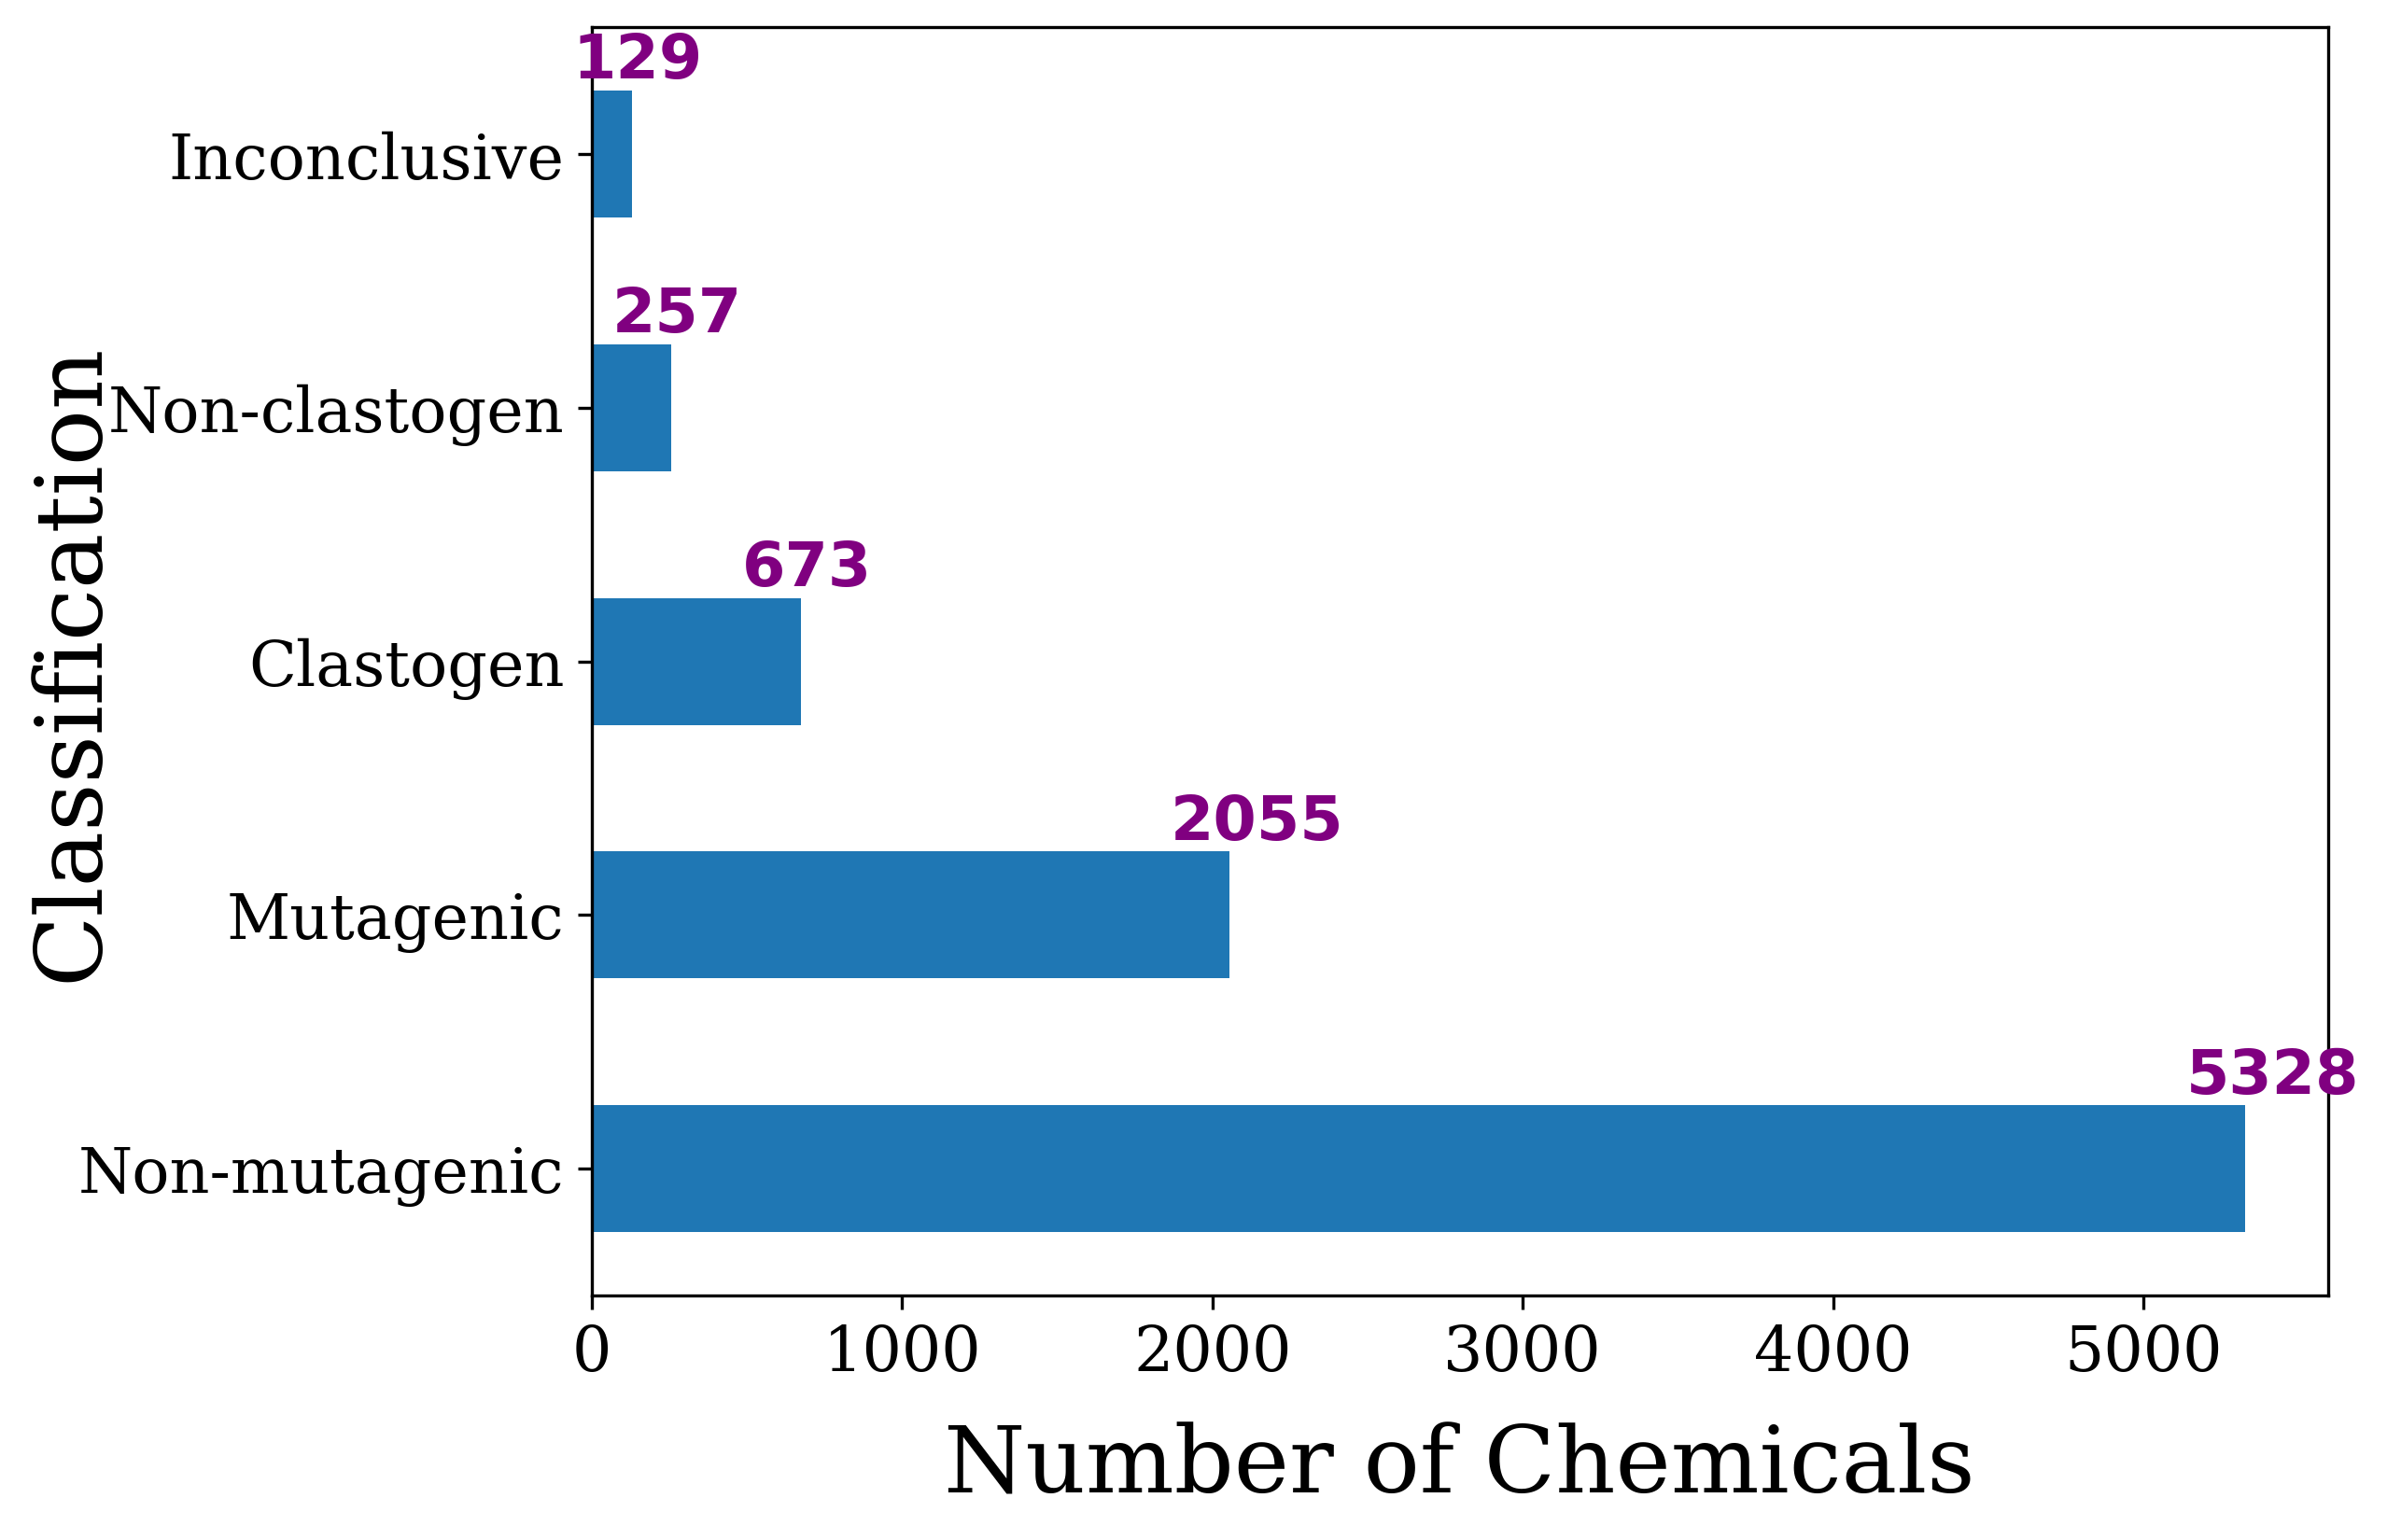

In [308]:
demarini = df_demarini.copy()

plt.figure(figsize=(8, 6), dpi = 300)
y = demarini.DeMarini_call.value_counts()
ax = y.plot.barh()
for i, v in enumerate(y):
    ax.text(v-190, i + .3, str(v), color='purple', fontsize = 16, fontweight = 'bold')
plt.xticks(fontsize = 16, family = 'serif')
ticklabels = ['Non-mutagenic', 'Mutagenic', 'Clastogen',  'Non-clastogen', 'Inconclusive']
plt.yticks(range(0,5), ticklabels, fontsize = 16, family = 'serif')
plt.xlabel('Number of Chemicals', size = 24, labelpad = 10, family = 'serif')
plt.ylabel('Classification', size = 24, labelpad = -10, family = 'serif')
plt.savefig(figures_dir+'ClassificationCount.png', bbox_inches='tight')

In [310]:
demarini = demarini.set_index('dtxsid')

In [313]:
demarini

,DeMarini_call
dtxsid,
DTXSID00100498,not clastogen
DTXSID00100670,non gentox
DTXSID00100756,non gentox
DTXSID00101041,gentox
DTXSID00101061,clastogen
...,...
DTXSID9097381,non gentox
DTXSID9098147,non gentox
DTXSID9098220,non gentox


In [312]:
genetox_data = df.copy()

Create a new dataframe for summary assay statistics per chemical

In [315]:
## Create a new dataframe for summary assay statistics per chemical
genetox_data_summary = pd.DataFrame(index = demarini.index, columns = ['nAmes', 'nAmesPos', 'nAmesNeg', 'nAmesInc', '%AmesPos', \
                                                                'nClas', 'nClasPos','nClasNeg', 'nClasInc', '%ClasPos', 'DeMarini'])
genetox_data_summary['DeMarini'] = demarini['DeMarini_call']
# Update each row in the dataframe
for dtxsid in genetox_data_summary.index:
    # Ames
    genetox_data_summary.loc[dtxsid, 'nAmes'] = len(genetox_data[(genetox_data['dtxsid'] == dtxsid) \
                            & (genetox_data['simple_aggregate'] == 'Ames')])
    genetox_data_summary.loc[dtxsid, 'nAmesPos'] = len(genetox_data[(genetox_data['dtxsid'] == dtxsid) \
                            & (genetox_data['simple_aggregate'] == 'Ames')\
                            & (genetox_data['assay_outcome'] == 1)])
    genetox_data_summary.loc[dtxsid, 'nAmesNeg'] = len(genetox_data[(genetox_data['dtxsid'] == dtxsid) \
                            & (genetox_data['simple_aggregate'] == 'Ames')\
                            & (genetox_data['assay_outcome'] == 0)])
    genetox_data_summary.loc[dtxsid, 'nAmesInc'] = len(genetox_data[(genetox_data['dtxsid'] == dtxsid) \
                            & (genetox_data['simple_aggregate'] == 'Ames')\
                            & (genetox_data['assay_outcome'] == 2)])
    if genetox_data_summary.loc[dtxsid, 'nAmes'] == 0:
        genetox_data_summary.loc[dtxsid, '%AmesPos'] = np.nan
    else:
        genetox_data_summary.loc[dtxsid, '%AmesPos'] = 100*genetox_data_summary.loc[dtxsid, 'nAmesPos']/genetox_data_summary.loc[dtxsid, 'nAmes']
    # Update inconclusives
    n1 = len(genetox_data[(genetox_data['dtxsid'] == dtxsid) \
                            & (genetox_data['simple_aggregate'] == 'Ames')\
                            & (genetox_data['assay_outcome'] == 2)])
    if genetox_data_summary.loc[dtxsid, '%AmesPos'] == 0 and n1 > 0:
        genetox_data_summary.loc[dtxsid, '%AmesPos'] = -9 #inconclusive is indicated by -9
   # Clastogens
    genetox_data_summary.loc[dtxsid, 'nClas'] = len(genetox_data[(genetox_data['dtxsid'] == dtxsid) \
                            & (genetox_data['simple_aggregate'] == 'clastogen')])
    genetox_data_summary.loc[dtxsid, 'nClasPos'] = len(genetox_data[(genetox_data['dtxsid'] == dtxsid) \
                            & (genetox_data['simple_aggregate'] == 'clastogen')\
                            & (genetox_data['assay_outcome'] == 1)])
    genetox_data_summary.loc[dtxsid, 'nClasNeg'] = len(genetox_data[(genetox_data['dtxsid'] == dtxsid) \
                            & (genetox_data['simple_aggregate'] == 'clastogen')\
                            & (genetox_data['assay_outcome'] == 0)])    
    genetox_data_summary.loc[dtxsid, 'nClasInc'] = len(genetox_data[(genetox_data['dtxsid'] == dtxsid) \
                            & (genetox_data['simple_aggregate'] == 'clastogen')\
                            & (genetox_data['assay_outcome'] == 2)])        
    if genetox_data_summary.loc[dtxsid, 'nClas'] == 0:
        genetox_data_summary.loc[dtxsid, '%ClasPos'] = np.nan
    else:
        genetox_data_summary.loc[dtxsid, '%ClasPos'] = 100*genetox_data_summary.loc[dtxsid, 'nClasPos']/genetox_data_summary.loc[dtxsid, 'nClas']
    # Update inconclusives 
    n2 = len(genetox_data[(genetox_data['dtxsid'] == dtxsid) \
                            & (genetox_data['simple_aggregate'] == 'clastogen')\
                            & (genetox_data['assay_outcome'] == 2)])    
    if genetox_data_summary.loc[dtxsid, '%ClasPos'] == 0 and n2 > 0:
        genetox_data_summary.loc[dtxsid, '%ClasPos'] = -9 #inconclusive is indicated by -9

In [316]:
genetox_data_summary

,nAmes,nAmesPos,nAmesNeg,nAmesInc,%AmesPos,nClas,nClasPos,nClasNeg,nClasInc,%ClasPos,DeMarini
dtxsid,,,,,,,,,,,
DTXSID00100498,0,0,0,0,NaN,1,0,1,0,0,not clastogen
DTXSID00100670,9,0,9,0,0,4,0,4,0,0,non gentox
DTXSID00100756,2,0,2,0,0,2,0,2,0,0,non gentox
DTXSID00101041,2,2,0,0,100,0,0,0,0,NaN,gentox
DTXSID00101061,1,0,1,0,0,2,1,1,0,50,clastogen
...,...,...,...,...,...,...,...,...,...,...,...
DTXSID9097381,3,0,3,0,0,0,0,0,0,NaN,non gentox
DTXSID9098147,4,0,4,0,0,0,0,0,0,NaN,non gentox
DTXSID9098220,2,0,2,0,0,2,0,2,0,0,non gentox


In [318]:
tag_demarini = {'clastogen':1, 'gentox':1, 'non gentox':0,  'inconclusive':np.nan,
       'not clastogen':0}

In [353]:
demarini['DeMarini_outcome'] = demarini['DeMarini_call'].replace(tag_demarini)

In [355]:
demarini.to_csv(processed_dat_dir+'DeMarini_calls_120221.csv')

In [319]:
genetox_data_summary['DeMarini_outcome'] = genetox_data_summary['DeMarini'].replace(tag_demarini)

In [347]:
genetox_data_summary.to_csv(processed_dat_dir+'genetox_data_summary_120221.csv')


Counts for Table 4. in manuscript (Analysis of chemicals tested in the Ames assay and their classification as genotoxic, non-genotoxic or inconclusive using the genotoxicity categorisation scheme)

In [322]:
#Ames
n10 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] < 50)])
n20 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] >= 50)]) 
n30 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] == -9)]) 
print("Count PercAmesPos <50 = %d" %n10)
print("Count PercAmesPos >=50 = %d" %n20)
print("Count Ames Inconclusives = %d" %n30)

#Ames and DeMarini negative
n11 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] < 50) & (genetox_data_summary['DeMarini_outcome'] ==0)])
n21 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] >= 50) & (genetox_data_summary['DeMarini_outcome'] ==0)])
n31 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] == -9) & (genetox_data_summary['DeMarini'] ==0)])
print("Count DeMarini negative and PercAmesPos <50 = %d" %n11)
print("Count DeMarini negative and PercAmesPos >=50 = %d" %n21)
print("Count DeMarini negative and Ames Inconclusives = %d" %n31)

#Ames and DeMarini positive
n12 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] < 50) & (genetox_data_summary['DeMarini_outcome'] ==1)])
n22 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] >= 50) & (genetox_data_summary['DeMarini_outcome'] ==1)])
n32 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] == -9) & (genetox_data_summary['DeMarini_outcome'] ==1)])
print("Count DeMarini positive and PercAmesPos <50 = %d" %n12)
print("Count DeMarini positive and PercAmesPos >=50 = %d" %n22)
print("Count DeMarini positive and Ames Inconclusives = %d" %n32)

#Ames and DeMarini Inconclusive
n13 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] < 50) & (genetox_data_summary['DeMarini_outcome'].isnull())])
n23 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] != -9) & (genetox_data_summary['%AmesPos'] >= 50) & (genetox_data_summary['DeMarini_outcome'].isnull())])
n33 = len(genetox_data_summary[(genetox_data_summary['%AmesPos'] == -9) & (genetox_data_summary['DeMarini_outcome'].isnull())])
print("Count DeMarini Inconclusive and PercAmesPos <50 = %d" %n13)
print("Count DeMarini Inconclusive and PercAmesPos >=50 = %d" %n23)
print("Count DeMarini Inconclusive and Ames Inconclusives = %d" %n33)

Count PercAmesPos <50 = 6303
Count PercAmesPos >=50 = 1673
Count Ames Inconclusives = 82
Count DeMarini negative and PercAmesPos <50 = 5328
Count DeMarini negative and PercAmesPos >=50 = 0
Count DeMarini negative and Ames Inconclusives = 0
Count DeMarini positive and PercAmesPos <50 = 897
Count DeMarini positive and PercAmesPos >=50 = 1673
Count DeMarini positive and Ames Inconclusives = 35
Count DeMarini Inconclusive and PercAmesPos <50 = 78
Count DeMarini Inconclusive and PercAmesPos >=50 = 0
Count DeMarini Inconclusive and Ames Inconclusives = 47


Counts for Table 5 in manuscript (A Characterisation of number of chemicals tested in less than K (1, 2, 3, 4, 5 and 10) or less number of Ames or Clastogen assays)

In [323]:
for k in range(11):
    a = genetox_data_summary[genetox_data_summary['nAmes'] <= k]['nAmes'].count()
    c = genetox_data_summary[genetox_data_summary['nClas'] <= k]['nClas'].count()
    print("Number of chemicals tested in <= %d Ames assays = %d" %(k,a))
    print("Number of chemicals tested in <= %d Clastogen assays = %d" %(k,c))

Number of chemicals tested in <= 0 Ames assays = 384
Number of chemicals tested in <= 0 Clastogen assays = 3689
Number of chemicals tested in <= 1 Ames assays = 3582
Number of chemicals tested in <= 1 Clastogen assays = 5384
Number of chemicals tested in <= 2 Ames assays = 5191
Number of chemicals tested in <= 2 Clastogen assays = 6852
Number of chemicals tested in <= 3 Ames assays = 6512
Number of chemicals tested in <= 3 Clastogen assays = 7288
Number of chemicals tested in <= 4 Ames assays = 7088
Number of chemicals tested in <= 4 Clastogen assays = 7745
Number of chemicals tested in <= 5 Ames assays = 7378
Number of chemicals tested in <= 5 Clastogen assays = 7865
Number of chemicals tested in <= 6 Ames assays = 7693
Number of chemicals tested in <= 6 Clastogen assays = 7996
Number of chemicals tested in <= 7 Ames assays = 7859
Number of chemicals tested in <= 7 Clastogen assays = 8094
Number of chemicals tested in <= 8 Ames assays = 7989
Number of chemicals tested in <= 8 Clastoge

In [332]:
genetox_data_summary.info()


<class 'pandas.core.frame.DataFrame'>
Index: 8442 entries, DTXSID00100498 to DTXSID9099876
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   nAmes             8442 non-null   object 
 1   nAmesPos          8442 non-null   object 
 2   nAmesNeg          8442 non-null   object 
 3   nAmesInc          8442 non-null   object 
 4   %AmesPos          8058 non-null   object 
 5   nClas             8442 non-null   object 
 6   nClasPos          8442 non-null   object 
 7   nClasNeg          8442 non-null   object 
 8   nClasInc          8442 non-null   object 
 9   %ClasPos          4753 non-null   object 
 10  DeMarini          8442 non-null   object 
 11  DeMarini_outcome  8313 non-null   float64
dtypes: float64(1), object(11)
memory usage: 1.1+ MB
